In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult.tsv',sep='\t')
#df=pd.read_csv('/content/drive/My Drive/Math627/adult.tsv', sep='\t')

df=pd.read_csv('/content/drive/MyDrive/math627/adult.tsv', sep='\t')

In [ ]:
len(df)
print(df)

       Age          workclass  fnlwgt   education  education-num  \
0       39          State-gov   77516   Bachelors             13   
1       50   Self-emp-not-inc   83311   Bachelors             13   
2       38            Private  215646     HS-grad              9   
3       53            Private  234721        11th              7   
4       28            Private  338409   Bachelors             13   
...    ...                ...     ...         ...            ...   
45217   33            Private  245211   Bachelors             13   
45218   39            Private  215419   Bachelors             13   
45219   38            Private  374983   Bachelors             13   
45220   44            Private   83891   Bachelors             13   
45221   35       Self-emp-inc  182148   Bachelors             13   

            marital-status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial     

In [ ]:
df = df.dropna()

In [ ]:
df=df.drop('fnlwgt',axis=1)
Z1=df['race']
Z2=df['gender']
Z3=df['relationship']
Y=df['income']
X=df.drop(['income','race','gender', 'education-num','relationship'], axis=1)

<ipython-input-43-35d36ea018b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Age', y='workclass', inner='box', palette='Dark2')


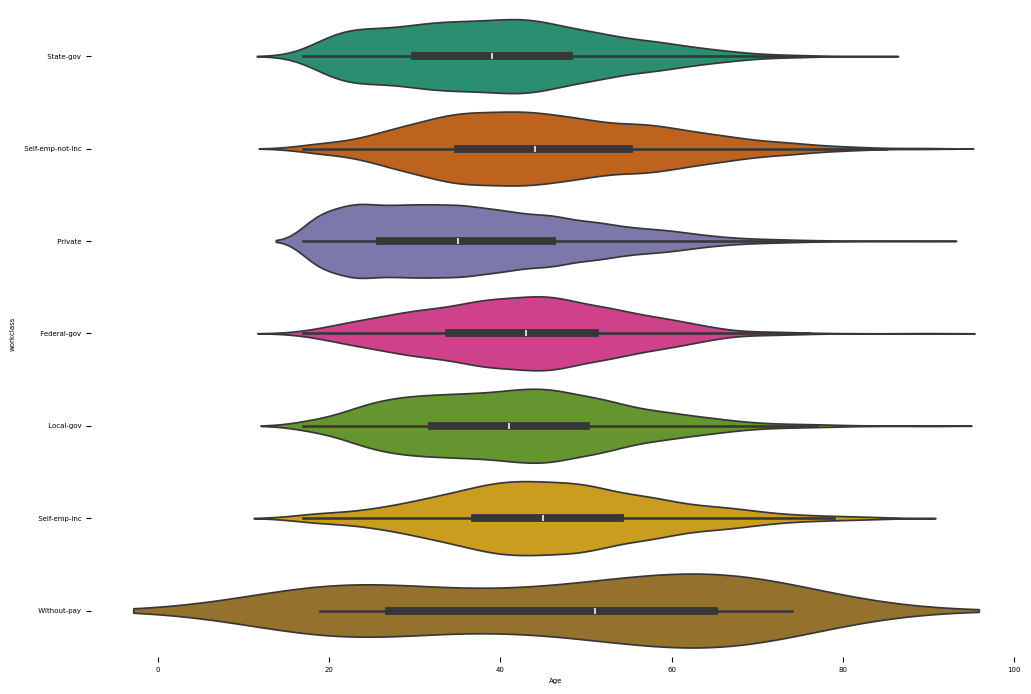

In [ ]:


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['workclass'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='workclass', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train

,Age,workclass,education,marital-status,occupation,capital gain,capital loss,hours per week,native-country
21964,27,Private,HS-grad,Married-civ-spouse,Adm-clerical,2580,0,45,United-States
15458,29,Private,HS-grad,Divorced,Machine-op-inspct,0,0,44,United-States
22168,29,State-gov,Some-college,Never-married,Prof-specialty,0,0,35,United-States
24363,19,Private,Some-college,Never-married,Sales,0,0,40,United-States
2972,44,Private,Bachelors,Married-civ-spouse,Exec-managerial,0,0,40,Puerto-Rico
...,...,...,...,...,...,...,...,...,...
40059,40,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,0,0,40,United-States
28017,17,Private,11th,Never-married,Adm-clerical,0,0,12,United-States
29199,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,0,0,40,United-States
40061,19,Private,HS-grad,Never-married,Craft-repair,0,0,40,United-States


In [ ]:
# Identify numerical and categorical features
numerical_features = ['Age', 'capital gain', 'capital loss', 'hours per week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'native-country']

In [ ]:
# Preprocess numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [ ]:
# Preprocess categorical features
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])


In [ ]:
# Combine preprocessed numerical and categorical features
X_train_processed = pd.concat([
    pd.DataFrame(X_train_scaled, columns=numerical_features),
    pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
], axis=1)

X_test_processed = pd.concat([
    pd.DataFrame(X_test_scaled, columns=numerical_features),
    pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_features))
], axis=1)

In [ ]:
# Define and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_processed, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Evaluate the model
Y_pred = model.predict(X_test_processed)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8486456605859591


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Z22 = label_encoder.fit_transform(Z2.str.strip())

In [ ]:
Z2_train=Z22[X_train.index]
Z2_test=Z22[X_test.index]

In [ ]:
yy_train, yy_test, z_train, z_test, =train_test_split(Y_pred,Z2_test,test_size=0.2,random_state=10)

In [ ]:
yy_train_2d = yy_train.reshape(-1, 1)
z_train_2d = z_train.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(yy_train_2d, z_train_2d)
Z_pred = logreg.predict(yy_test.reshape(-1, 1))

# Evaluate the logistic regression model
accuracy = accuracy_score(z_test.reshape(-1, 1), Z_pred)
print(f"Accuracy of gender prediction using Logistic Regression: {accuracy:.4f}")

Accuracy of gender prediction using Logistic Regression: 0.6545


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(len(Y_pred))
print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))

9045
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6805
           1       0.73      0.61      0.67      2240

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.78      9045
weighted avg       0.84      0.85      0.84      9045

[[6305  500]
 [ 869 1371]]


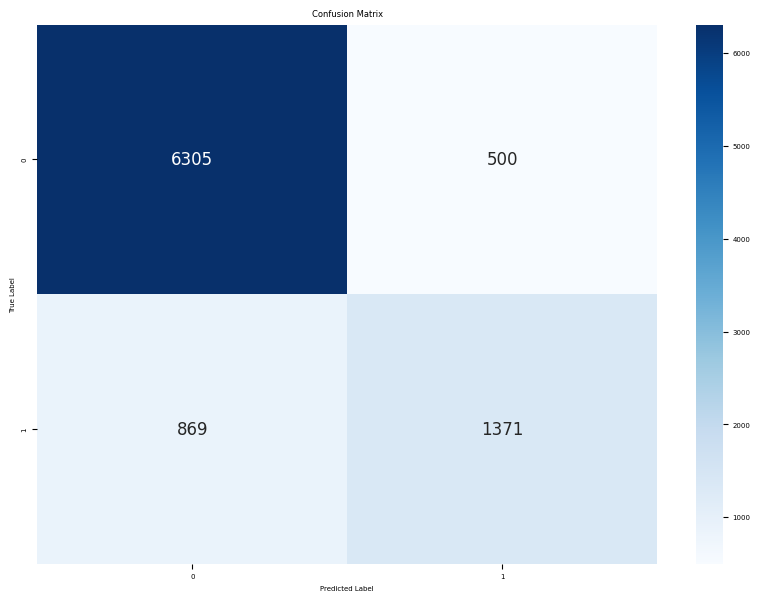

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
!git clone https://github.com/cohortshapley/cohortshapley
!pip install -e cohortshapley

fatal: destination path 'cohortshapley' already exists and is not an empty directory.
Obtaining file:///content/cohortshapley
  Preparing metadata (setup.py) ... done
  Attempting uninstall: cohortshapley
    Found existing installation: cohortshapley 0.1.0
    Uninstalling cohortshapley-0.1.0:
      Successfully uninstalled cohortshapley-0.1.0
  Running setup.py develop for cohortshapley


In [ ]:
pip install --upgrade cohortshapley

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from cohortshapley.cohortshapley import similarity
from cohortshapley.cohortshapley import cohortshapley as cs

In [ ]:
X_test['Y_truth']=Y_test
X_test['Y_pred']=Y_pred

In [ ]:
X_test['TP'] = ((X_test['Y_pred'] == 1).values & (X_test['Y_truth'] == 1).values).astype(int)
X_test['FP'] = ((X_test['Y_pred'] == 1).values & (X_test['Y_truth'] == 0).values).astype(int)
X_test['TN'] = ((X_test['Y_pred'] == 1).values & (X_test['Y_truth'] == 0).values).astype(int)
X_test['FN'] = ((X_test['Y_pred'] == 1).values & (X_test['Y_truth'] == 1).values).astype(int)

In [ ]:
X_test['Gender']=Z2[X_test.index]
X_test['Race']=Z1[X_test.index]
X_test['Gender'].replace([' Male', ' Female'], [1, 0], inplace=True)
X_test['Race'].replace(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], [1, 2,3,4,5], inplace=True)
X_test

,Age,workclass,education,marital-status,occupation,capital gain,capital loss,hours per week,native-country,Y_truth,Y_pred,TP,FP,TN,FN,Gender,Race
39862,53,Private,HS-grad,Married-civ-spouse,Craft-repair,0,0,40,United-States,0,0,0,0,0,0,1,White
36319,20,Private,HS-grad,Never-married,Other-service,0,1721,20,United-States,0,0,0,0,0,0,0,White
4524,28,State-gov,HS-grad,Married-civ-spouse,Adm-clerical,0,0,40,United-States,0,0,0,0,0,0,0,White
4113,25,Private,Assoc-voc,Never-married,Prof-specialty,0,0,36,Canada,0,0,0,0,0,0,0,White
41687,43,Federal-gov,HS-grad,Married-civ-spouse,Craft-repair,0,0,40,United-States,1,0,0,0,0,0,1,Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15691,36,Private,Assoc-acdm,Married-civ-spouse,Prof-specialty,0,0,40,United-States,1,0,0,0,0,0,1,White
37328,29,Private,Some-college,Married-civ-spouse,Adm-clerical,0,0,50,United-States,0,0,0,0,0,0,0,White
14141,58,Private,HS-grad,Divorced,Other-service,0,0,20,United-States,0,0,0,0,0,0,0,Black
811,49,Private,9th,Divorced,Machine-op-inspct,0,0,40,United-States,0,0,0,0,0,0,0,White


In [ ]:
is_priv = X_test['Gender'] == 0
is_unpriv = ~is_priv
n_priv = is_priv.sum()
n_unpriv = is_unpriv.sum()
print('Number of subjects in  privileged group: ', n_priv, ' unpriviledged group: ', n_unpriv)

Number of subjects in  privileged group:  3030  unpriviledged group:  6015


In [ ]:
priv_r = X_test['Y_truth'][is_priv]
unpriv_r = X_test['Y_truth'][is_unpriv]
priv_r_ratio = (priv_r == 1).sum() / n_priv
unpriv_r_ratio = (unpriv_r == 1).sum() / n_unpriv
print('Priviledged group: ', priv_r_ratio, ' unpriviledged group: ', unpriv_r_ratio)
print('Total: ', X_test['Y_truth'].mean())
print('Demographic parity: ', unpriv_r_ratio - priv_r_ratio )

Priviledged group:  0.11683168316831684  unpriviledged group:  0.313549459684123
Total:  0.2476506357103372
Demographic parity:  0.1967177765158062


In [ ]:
X_wr=X_test['Gender'].reset_index()

In [ ]:
subject = X_wr.values
similarity.ratio = 0.1
f=False
cs_pred = cs.CohortShapley(f, similarity.similar_in_samebin, np.arange(len(subject)), subject, y=X_test['Y_pred'], parallel=10)

use given y values instead of model prediction.


In [ ]:
cs_pred.compute_cohort_shapley()

parallel processing with 10 processes
use given y values instead of model prediction.use given y values instead of model prediction.use given y values instead of model prediction.use given y values instead of model prediction.


use given y values instead of model prediction.

  0%|          | 0/905 [00:00<?, ?it/s]

use given y values instead of model prediction.



  0%|          | 0/905 [00:00<?, ?it/s]


use given y values instead of model prediction.

  0%|          | 0/905 [00:00<?, ?it/s]

use given y values instead of model prediction.use given y values instead of model prediction.
use given y values instead of model prediction.

  0%|          | 0/904 [00:00<?, ?it/s]

  0%|          | 0/905 [00:00<?, ?it/s]

100%|██████████| 905/905 [00:21<00:00, 42.48it/s]

100%|██████████| 904/904 [00:21<00:00, 42.23it/s]


In [ ]:
def conditioned_shapley_hist(X, bin_val, shapley_values, condvar, expvar, bin_label=None, ylim=(0,2500), xlim=None):
    vals = bin_val[condvar]
    col = X.columns
    n_vals = len(vals)
    cond = {}
    for k in range(n_vals):
        cond[k] = np.where(X[col[condvar]] == vals[k])[0]
    jj = expvar
    for k in range(n_vals):
        v = shapley_values[:,jj]
        n_bins = 70
        bins = np.linspace(v.min(),v.max()+0.001, n_bins+1, endpoint=True)
        if bin_label:
            l = bin_label[k]
        else:
            l = k
        plt.hist(shapley_values[cond[k]][:,jj], bins=bins, alpha=0.8,label=l)
    plt.ylim(ylim)
    if xlim:
        plt.xlim(xlim)

In [ ]:
bin_X_wr = similarity.binning(X_wr.values)
bin_idx = bin_X_wr[0]
bin_val = bin_X_wr[1]

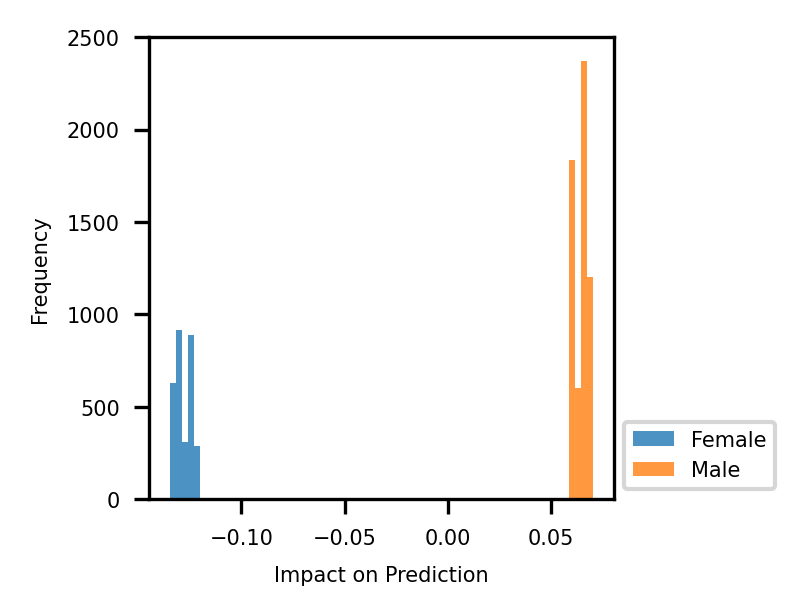

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
# fig = plt.figure(figsize=(2,2),dpi=300)
# plt.rcParams["font.size"] = 5
# conditioned_shapley_hist(X_wr, bin_val, cs_pred.shapley_values,1,1, bin_label=['Female','Male'])
# plt.legend(bbox_to_anchor=(1,0), loc='lower left')
# plt.xlabel('Impact on Prediction')
# plt.ylabel('Frequency')


import matplotlib.pyplot as plt
from google.colab import files

# 创建图形并设置大小和分辨率
fig = plt.figure(figsize=(2,2), dpi=300)
plt.rcParams["font.size"] = 5

# 这里假设conditioned_shapley_hist是一个用于绘图的函数
# 示例中的参数需要根据你的数据和变量具体定义
conditioned_shapley_hist(X_wr, bin_val, cs_pred.shapley_values, 1, 1, bin_label=['Female', 'Male'])

# 设置图例位置
plt.legend(bbox_to_anchor=(1, 0), loc='lower left')

# 添加坐标轴标签
plt.xlabel('Impact on Prediction')
plt.ylabel('Frequency')

# 保存图形到Colab的临时环境
plt.savefig('LR.png', bbox_inches='tight')  # Ensure the filename here matches the download filename

# 显示图形
plt.show()

# 下载图形到你的本地机器
files.download('LR.png')  # Filename must match the one used in plt.savefig()
